In [1]:
# Must run another "shift enter" run to complete the imports
# Science imports
import pandas as pd
import numpy as np

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default.
sns.set_style("darkgrid") # set a grey grid as a background

# turn off warnings
import warnings
warnings.filterwarnings('ignore')


#### Regression Problem

based on feature 1 and feature 2, attempt to predict price

historical data - supervised learning problem

The goal is to produce a model that, when a new item is found we can use feature1 and feature2 to predict a price.


In [2]:
df = pd.read_csv('TensorFlow_FILES/DATA/fake_reg.csv')

EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
price       1000 non-null float64
feature1    1000 non-null float64
feature2    1000 non-null float64
dtypes: float64(3)
memory usage: 23.5 KB


In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


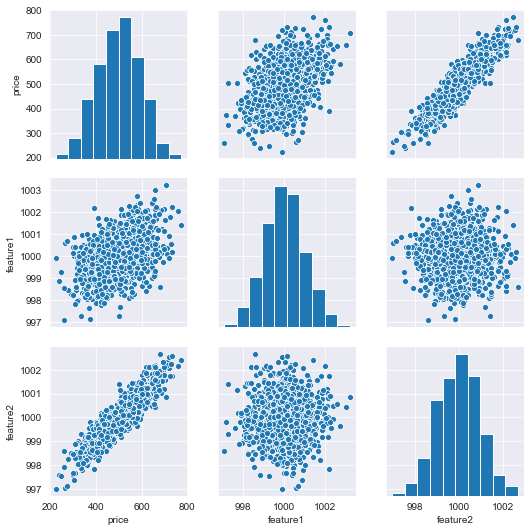

In [5]:
sns.pairplot(df)

#### Create test/train split

In [19]:
from sklearn.model_selection import train_test_split

In [11]:
# we need to pass in numpy arrays and not dataframes for tensorflow
# the data that we're going to analyze is capital X
X = df[['feature1','feature2']].values

In [13]:
X[:10]

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       [ 999.9522513 , 1000.44094031],
       [1000.44601093, 1000.33853129],
       [ 999.69318368, 1000.62800622],
       [1000.27585506, 1000.44494944],
       [1000.41420453,  998.87848624],
       [1000.01660648,  998.47599671],
       [ 999.90564561, 1001.59448139]])

In [14]:
# the feature we're trying to predict (price) is lowercase y
y = df['price'].values

In [21]:
#test_train_split syntax
# splits data into features (X_x) and labels (Y_x)
# test_size is the subset of data (%33) that we want to work with
# the split happens randomly - random_state lets you make that random state consistent and repeatable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
X_train.shape, X_test.shape

((670, 2), (330, 2))

In [29]:
y_train[:10], y_test[:10]

(array([425.4599912 , 452.71044444, 521.7744574 , 565.24995494,
        461.52792939, 493.01201779, 606.21795936, 509.84188626,
        429.47259522, 413.10071452]),
 array([402.29631873, 624.15619847, 582.4550663 , 578.58860646,
        371.22410361, 584.38110772, 514.40564086, 464.11587006,
        551.65009963, 451.8041724 ]))

weights and biases can be a problem. One way to get around that is to normalize and scale the feature data. 
sklearn has a number of preprocessing scalers.

This will use the MinMaxScaler:

This estimator scales and translates each feature individually such
that it is in the given range on the training set, e.g. between
zero and one.  
The transformation is given by::

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

where min, max = feature_range.


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
# help(MinMaxScaler)

In [32]:
# create the instance
scaler = MinMaxScaler()

In [34]:
# .fit calculates the parameters it needs to perform the eventual transform scaling 
# this needs stdev, min and max in the dataset
#
# This is only run on the training set to avoid Data Leakage (have prior information) on the test set
# 
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [35]:
# now transform the training data
X_train = scaler.transform(X_train)

In [36]:
# now for test
X_test = scaler.transform(X_test)

In [37]:
# notice that min and max are now 0 and 1 (linear regression)
X_train.min(), X_train.max()

(0.0, 1.0)

#### Now create a neural network


In [38]:
#import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

two ways to call a keras based model

one way is to call sequential and pass in a list of the layers

Dense is a normal feedforward network where every neuron is connected to another neuron in the next layer
basic simple layer
Dense() needs two params - units (how many) and activation (what activation function - sigmoid, etc).
this will use 4 units and the Rectified Linear Unit function (ReLU)

**Simple example**
```
model = Sequential([Dense(4, activation='relu')])
```

**complex example**

- just keep adding more functions into the list

```model = Sequential([Dense(4, activation='relu'),  
                   Dense(2, activation='relu'),  
                   Dense(6, activation='sigmoid')])```

In [44]:
# # Simple example
# #model = Sequential([Dense(4, activation='relu')])
# # add more functions into the list
# model = Sequential([Dense(4, activation='relu'),
#                    Dense(2, activation='relu'),
#                    Dense(6, activation='sigmoid')])

**the second way is to add the layers in separately one at a time**

This is a little easier to work with because you can easily comment a line out or add another in.

```
model = Sequential()
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1))
model.compile()
```

produces the same results. 

The final output is important. The last layer will be a single neuron that produces a single price as the output. It will be measured against the True Price with some sort of loss function in the .compile() stage.

.compile(optimizer,loss_function) - this needs an optimizer to perform the gradiant descent (rmsprop, adam). Also need the loss parameter, which depends on the type of the problem. In this case since we're performing a regression so we use "mean square error (mse)"

### Choosing an Optimizer and Loss

**Multi-class classification problem**  
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

**Binary classification problem**
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

**Mean squared error regression problem**
model.compile(optimizer='rmsprop', loss='mse')


In [50]:
# model = Sequential()
# model.add(Dense(6, activation='relu'))
# model.add(Dense(2, activation='relu'))
# model.add(Dense(4, activation='sigmoid'))

In [58]:
# three layers with a final single output node
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')

### Principal Parameters in Keras

**Sample**: 
- one element of a dataset.
        Example: one image is a sample in a convolutional network
        Example: one audio file is a sample for a speech recognition model
        
**Batch**: 
- a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).  

**Epoch**: 
- an arbitrary cutoff, generally defined as “one pass over the entire dataset”, used to separate training into distinct phases, which is useful for logging and periodic evaluation.
  
  When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.


verbosity can be set to a non-zero number to get more debug data

In [59]:
# now to fit the model to the training data - need params x, y and epochs
# x (data we're training on - X_train), y (training labels for training features - y_train), epochs - one pass over the dataset
model.fit(x=X_train,y=y_train, epochs=250)


Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 256334.4531
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 256181.2031
Epoch 3/250
21/21 [==============================] - 0s 1ms/step - loss: 256027.8750
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 255859.8750
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 255677.8750
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 255481.5312
Epoch 7/250
21/21 [==============================] - 0s 1ms/step - loss: 255269.6562
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 255039.5000
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 254791.1406
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 254524.0156
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 254232.9062
Epoch 12/250
21/21 [==============================] - 0s 1ms/st

21/21 [==============================] - 0s 1ms/step - loss: 44987.0156
Epoch 97/250
21/21 [==============================] - 0s 1ms/step - loss: 41156.1523
Epoch 98/250
21/21 [==============================] - 0s 1ms/step - loss: 37420.0156
Epoch 99/250
21/21 [==============================] - 0s 1ms/step - loss: 33789.9531
Epoch 100/250
21/21 [==============================] - 0s 948us/step - loss: 30282.6738
Epoch 101/250
21/21 [==============================] - 0s 1ms/step - loss: 26933.1855
Epoch 102/250
21/21 [==============================] - 0s 1ms/step - loss: 23713.5723
Epoch 103/250
21/21 [==============================] - 0s 1ms/step - loss: 20690.0410
Epoch 104/250
21/21 [==============================] - 0s 1ms/step - loss: 17853.1113
Epoch 105/250
21/21 [==============================] - 0s 1ms/step - loss: 15175.8594
Epoch 106/250
21/21 [==============================] - 0s 1ms/step - loss: 12703.5430
Epoch 107/250
21/21 [==============================] - 0s 1ms/step - 

21/21 [==============================] - 0s 1ms/step - loss: 544.7778
Epoch 192/250
21/21 [==============================] - 0s 932us/step - loss: 531.1698
Epoch 193/250
21/21 [==============================] - 0s 976us/step - loss: 516.4888
Epoch 194/250
21/21 [==============================] - 0s 965us/step - loss: 503.3012
Epoch 195/250
21/21 [==============================] - 0s 921us/step - loss: 488.8965
Epoch 196/250
21/21 [==============================] - 0s 997us/step - loss: 474.0400
Epoch 197/250
21/21 [==============================] - 0s 992us/step - loss: 460.6793
Epoch 198/250
21/21 [==============================] - 0s 1ms/step - loss: 446.3370
Epoch 199/250
21/21 [==============================] - 0s 966us/step - loss: 432.7658
Epoch 200/250
21/21 [==============================] - 0s 864us/step - loss: 421.2193
Epoch 201/250
21/21 [==============================] - 0s 982us/step - loss: 409.1320
Epoch 202/250
21/21 [==============================] - 0s 925us/step - l

**plotting the training history**


In [60]:
# dump the loss function outputs
model.history.history

{'loss': [256334.453125,
  256181.203125,
  256027.875,
  255859.875,
  255677.875,
  255481.53125,
  255269.65625,
  255039.5,
  254791.140625,
  254524.015625,
  254232.90625,
  253916.03125,
  253572.921875,
  253204.53125,
  252806.203125,
  252381.34375,
  251926.28125,
  251438.359375,
  250918.421875,
  250364.796875,
  249775.015625,
  249149.0625,
  248486.09375,
  247781.75,
  247032.21875,
  246243.984375,
  245411.203125,
  244533.828125,
  243612.703125,
  242645.25,
  241630.421875,
  240552.671875,
  239433.171875,
  238263.734375,
  237033.859375,
  235750.109375,
  234409.078125,
  233005.4375,
  231552.71875,
  230030.1875,
  228448.984375,
  226802.0,
  225088.453125,
  223308.796875,
  221461.5,
  219554.3125,
  217567.140625,
  215519.359375,
  213399.359375,
  211204.4375,
  208943.46875,
  206612.828125,
  204198.1875,
  201711.21875,
  199145.515625,
  196506.1875,
  193796.15625,
  191015.375,
  188151.6875,
  185208.796875,
  182206.03125,
  179125.65625,
  17

In [61]:
# pass into dataframe
loss_df = pd.DataFrame(model.history.history)

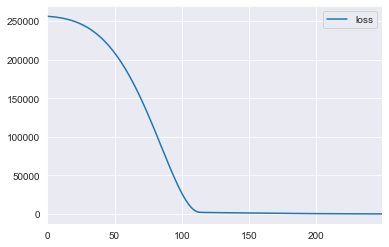

In [62]:
# now plot
# losses start out high, but as the weights and biases adjust the values decline until they level off
# later this will be compared to validation loss to find overfitting
loss_df.plot()

### Evaluate model against the test set

using model.evaluate(x, y) to return the model's loss on the test set (mse)

In this case the models performance against the test set returns a Mean Squared Error of 36.49

There will be variation between runs, but after training over many epochs the return value should settle into a small range.

In [63]:
# evaluate test set
model.evaluate(X_test, y_test, verbose=0)

36.49918746948242

In [64]:
#evaluate train set
model.evaluate(X_train, y_train, verbose=0)

36.94236373901367

In [65]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)
print('training Score:', training_score)
print('test Score:', test_score)

training Score: 36.94236373901367
test Score: 36.49918746948242


#### now make test predictions of what it thinks the price should be

In [72]:
# a list of price predictions based on X_test
test_predictions = model.predict(X_test)
test_predictions[:10]

array([[409.85983],
       [620.1664 ],
       [589.79065],
       [570.9738 ],
       [373.07895],
       [577.4929 ],
       [516.0991 ],
       [461.52887],
       [548.82056],
       [450.3244 ]], dtype=float32)

In [73]:
# transform into a pandas series instead of a numpy array
test_predictions = pd.Series(test_predictions.reshape(330,))

In [79]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])
pred_df.head()

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104


In [80]:
# join the pred_df with the test predictions - use axis=1 to join along columns
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [82]:
# label the columns
pred_df.columns = ['Test True Y','Model Predictions']

In [85]:
# This now indicates the ground truth (test true y) and the model predictions 
pred_df[:3]

,Test True Y,Model Predictions
0,402.296319,409.859833
1,624.156198,620.166382
2,582.455066,589.790649


If the predictions are completely accurate this should be a unvaried straight line

This fits very close, but with some variation

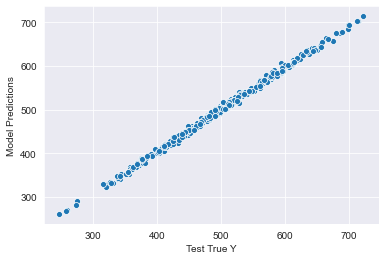

In [87]:
# now plot them against each other
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df,cmap='plasma')

#### now get regression metrics
RMSE, MSE and MAE
Mean Abolute Error
Mean Squared Error
Root Mean Squared Error

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

This indicates that the prediction is about $4.92 off the the real price point

In [89]:
# syntax: mean_absolute_error('y_true', 'y_pred')
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.920459055714976

In [92]:
# syntax: mean_squared_error('y_true', 'y_pred')
# this is the same value as the model.evaluate() step, because our loss function is MSE
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

36.49919640479642

In [98]:
# getting RMSE - Root Mean Squared Error is taking MSE to the power of .5
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions']) ** .5

6.041456480418974

In [99]:
# could also use numpy
np.sqrt(mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions']))

6.041456480418974

Is 4.92 good or bad?

    The average price (mean price) is $498 a maximum price of $774 and a minimum of $223  Our MSE is off by $4.92, which is < 1%. If the price were $1 and we were off by $5, we'd be %500 wrong.

    The MSE is meaningless with the context of the label you want to predict (price)



In [91]:
df.describe()


,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


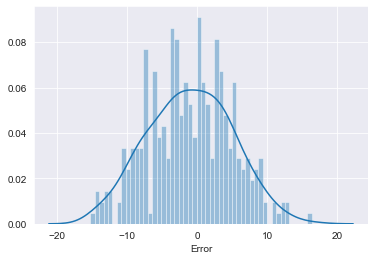

In [114]:
# distribution errors on a histogram
pred_df['Error'] = pred_df['Test True Y'] - pred_df['Model Predictions']
sns.distplot(pred_df['Error'],bins=50)


In [113]:
# metrics
print('MAE:',mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions']))
print('MSE:',mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions']))
print('MSE (from model.evaluate):',test_score)
print('RMSE:',test_score**0.5)


MAE: 4.920459055714976
MSE: 36.49919640479642
MSE (from model.evaluate): 36.49918746948242
RMSE: 6.04145574091894


#### Predicting from new data


In [101]:
# here we'll say the new item has a feature 1 of 998 and a feature 2 of 1000
# what should I price this at?
new_gem = [[998,1000]]

In [102]:
# the model is trained on the Scale of the features
# so first transform it
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [103]:
new_gem = scaler.transform(new_gem)

In [104]:
model.predict(new_gem)

array([[424.18332]], dtype=float32)

The price should be somewhere around 424 dollars.

The process you use for the test set is the same model to use for new data



#### Saving the model

This will save the file in hdf5 format.

The Hierarchical Data Format version 5 (HDF5), is an open source file format that supports large, complex, heterogeneous data. 

In [105]:
from tensorflow.keras.models import load_model

In [106]:
# now save as an hdf5 file
model.save('my_gem_model.h5')

Now saved. Later on if you're in a new notebook and you want to run the model

In [108]:
later_model = load_model('my_gem_model.h5')

In [109]:
# and it shows the same results
later_model.predict(new_gem)

array([[424.18332]], dtype=float32)